### Import Required libraries and Loading the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upload = files.upload()

Saving data1.csv to data1 (2).csv


In [ ]:
data = pd.read_csv('data1.csv')
data.head()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall,fog,AOD
0,2009,11,1,3,19.38,0.34,88.71,986.44,87.93,1593.0,128,-999.0
1,2009,11,1,6,28.27,0.34,32.99,986.14,44.92,1593.0,128,-999.0
2,2009,11,1,9,29.79,0.54,109.73,983.80,33.97,1593.0,128,-999.0
3,2009,11,1,10,29.69,0.64,103.86,983.50,34.95,1593.0,128,-999.0
4,2009,11,1,11,27.39,0.05,358.99,983.70,56.94,1593.0,128,-999.0


In [ ]:
data.shape

(54151, 12)

In [ ]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'air_temp', 'windspeed', 'winddir',
       'pressure', 'humidity', 'rainfall', 'fog', 'AOD'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54151 entries, 0 to 54150
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       54151 non-null  int64  
 1   Month      54151 non-null  int64  
 2   Day        54151 non-null  int64  
 3   Hour       54151 non-null  int64  
 4   air_temp   54151 non-null  float64
 5   windspeed  54151 non-null  float64
 6   winddir    54151 non-null  float64
 7   pressure   54151 non-null  float64
 8   humidity   54151 non-null  float64
 9   rainfall   54151 non-null  float64
 10  fog        54151 non-null  int64  
 11  AOD        54151 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 5.0 MB


In [ ]:
data.describe()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall,fog,AOD
count,54151.000000,54151.000000,54151.000000,54151.000000,54151.000000,54151.000000,54151.000000,54151.000000,54151.000000,54151.000000,54151.000000,54151.000000
mean,2014.969548,6.458976,15.663921,11.470074,42.122888,16.561199,518.406951,995.061132,83.477715,114.952751,101.466584,-926.451340
std,2.835375,3.494273,8.796899,6.919315,432.679167,402.696684,1480.708837,363.368471,398.554712,531.203843,51.873207,259.310628
min,2009.000000,1.000000,1.000000,0.000000,-40.000000,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,-999.000000
25%,2012.000000,3.000000,8.000000,5.000000,16.600000,0.000000,214.100000,974.900000,48.000000,0.000000,128.000000,-999.000000
50%,2016.000000,6.000000,16.000000,11.000000,25.100000,0.000000,359.000000,981.160000,71.000000,2.000000,128.000000,-999.000000
75%,2017.000000,10.000000,23.000000,17.000000,29.800000,0.500000,359.200000,986.900000,89.000000,20.000000,128.000000,-999.000000
max,2019.000000,12.000000,31.000000,28.000000,9999.900000,9999.900000,9999.900000,9999.900000,9999.900000,9999.900000,128.000000,3.813740


In [ ]:
#Dropping unnecessary columns
data.drop(['fog','AOD'],axis=1,inplace=True)

###Exploratory Data Analysis

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Customize the graphs or plots
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (5,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Detecting outliers

##### air_temp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



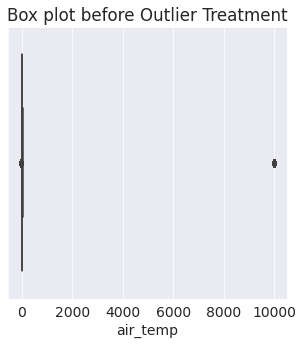

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



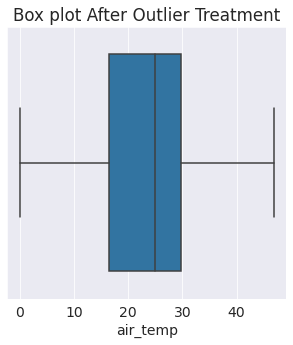

In [ ]:
#Checking for outliers
sns.boxplot(data['air_temp'])
plt.title('Box plot before Outlier Treatment')
plt.show()
for i in data['air_temp']:
  q1 = data['air_temp'].quantile(0.25)
  q3 = data['air_temp'].quantile(0.75)
  iqr = q3 - q1
  lwr_bound = q1 - 1.5 * iqr
  upr_bound = q3 + 1.5 * iqr
  if i > upr_bound or i < lwr_bound:
    data['air_temp'] = data['air_temp'].replace(i, 0) #zero
sns.boxplot(data['air_temp'])
plt.title('Box plot After Outlier Treatment')
plt.show()

##### humidity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



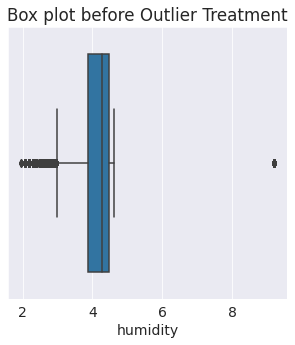

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



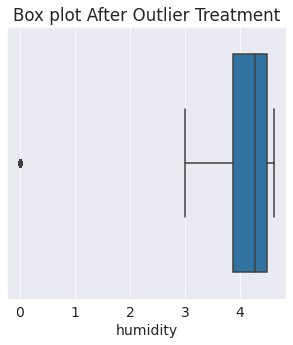

In [ ]:
#Checking for outliers
sns.boxplot(data['humidity'])
plt.title('Box plot before Outlier Treatment')
plt.show()
for i in data['humidity']:
  q1 = data['humidity'].quantile(0.25)
  q3 = data['humidity'].quantile(0.75)
  iqr = q3 - q1
  lwr_bound = q1 - 1.5 * iqr
  upr_bound = q3 + 1.5 * iqr
  if i > upr_bound or i < lwr_bound:
    data['humidity'] = data['humidity'].replace(i, 0) #zero
sns.boxplot(data['humidity'])
plt.title('Box plot After Outlier Treatment')
plt.show()

### Splitting the data

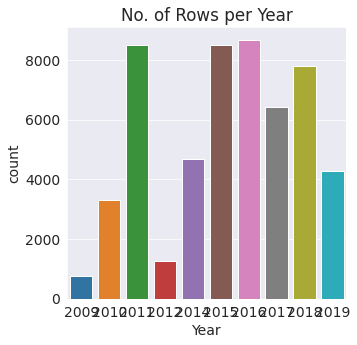

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x = data.Year);

In [ ]:
#Splitting the data into train and test according to the "Year" column.
train = data[data['Year']<2018].copy()
train.tail()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall
42086,2017,9,25,5,28.9,0.0,359.2,981.3,77.0,2.0
42087,2017,9,25,6,30.5,0.0,359.2,980.8,70.0,2.0
42088,2017,9,25,7,31.2,0.0,359.2,979.9,64.0,2.0
42089,2017,9,25,8,32.3,0.0,359.2,979.5,65.0,2.0
42090,2017,9,25,9,32.4,0.0,359.2,978.8,62.0,4.0


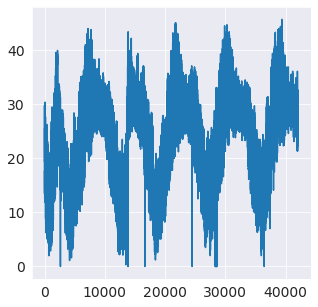

In [ ]:
train['air_temp'].plot()

In [ ]:
test = data[data['Year']>=2018].copy()
test.head()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall
42091,2018,1,11,10,0.0,0.0,359.2,925.0,0.0,0.0
42092,2018,1,11,11,0.0,0.0,359.2,925.0,0.0,0.0
42093,2018,1,11,12,0.0,0.0,359.2,925.0,0.0,0.0
42094,2018,1,11,13,0.0,0.0,359.2,925.0,0.0,0.0
42095,2018,1,11,14,0.0,0.0,359.2,925.0,0.0,0.0


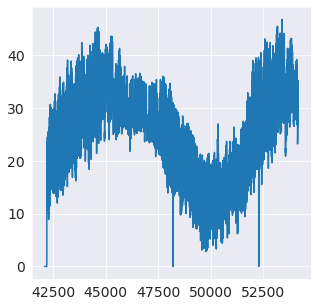

In [ ]:
test['air_temp'].plot()



```
          X - min(X)
X_new = ----------------
         max(X) - min(X)
```



###Scaling Numeric columns to range(0,1) 

- For standardizing/normalization of the input data



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train = scaler.fit_transform(train)

In [ ]:
train

array([[0.00000000e+00, 9.09090909e-01, 0.00000000e+00, ...,
        6.77032254e-03, 8.79308793e-03, 1.59301593e-01],
       [0.00000000e+00, 9.09090909e-01, 0.00000000e+00, ...,
        6.73726432e-03, 4.49204492e-03, 1.59301593e-01],
       [0.00000000e+00, 9.09090909e-01, 0.00000000e+00, ...,
        6.47941024e-03, 3.39703397e-03, 1.59301593e-01],
       ...,
       [1.00000000e+00, 7.27272727e-01, 8.00000000e-01, ...,
        6.04965344e-03, 6.40006400e-03, 2.00002000e-04],
       [1.00000000e+00, 7.27272727e-01, 8.00000000e-01, ...,
        6.00557582e-03, 6.50006500e-03, 2.00002000e-04],
       [1.00000000e+00, 7.27272727e-01, 8.00000000e-01, ...,
        5.92843998e-03, 6.20006200e-03, 4.00004000e-04]])

###Dividing Train data into time shifts  
- **_Lstm_** is good at memorizing previous data,we are provinding past data for each input in timeshifts.  
- Suppose, we want to predict todays temperature, we need to know the past data to predict. so we are using 30 days of previous days data in order to make predict.

In [ ]:
#Create two empty lists x_train and y_train
X_train = []
y_train = []

- For every target value we feed into out network, we need past 30 days data for that target value.
- We are collecting the past 30 days of target value in "**X_list**" and the target value in "**y_list**".
- so for all values it will take past 30 days values for each target value by iteration of the following loop.

In [ ]:
for i in range(30, train.shape[0]):
  X_train.append(train[i-30:i])
  y_train.append(train[i,4])

In [ ]:
#Converting Lists into numpy arrays
X_train , y_train = np.array(X_train) , np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((42061, 30, 10), (42061,))

###LSTM - Stacked Long Short-Term Memory Networks


An overview of the LSTM model life-cycle in Keras.

1. Define Network
2. Compile Network
3. Fit Network
4. Evaluate Network
5. Make Predictions

In [ ]:
#Import libraries
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [ ]:
# sequential() -->Time Series data are sequential data
model = Sequential()

In [ ]:
X_train.shape[1],10

(30, 10)

###1.Define Network



In [ ]:
model.add(LSTM(100 , return_sequences= True , activation='relu', input_shape = (X_train.shape[1],10) , kernel_regularizer= keras.regularizers.l2(0.001))) 

model.add(Dropout(0.3)) # Add a dropout layer in order to avoid overfitting.

model.add(LSTM(100, return_sequences= True)) # Hidden layer,Another Lstm layer for stacked Lstm method.

model.add(Dropout(0.3))

model.add(LSTM(100))

# final Output layer.
model.add(Dense(1))

- **_Dense Layer:_**  The dense layer is a fully connected layer, which means all the neurons in a layer are connected to those in the next layer
- **_Dropout:_** In the dropout technique, some of the neurons in hidden or visible layers are dropped or omitted randomly. Dropout technique regularizes the neural network model to produce a robust model which does not overfit.

In [ ]:
# printing the model summary or the Architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 100)           44400     
_________________________________________________________________
dropout (Dropout)            (None, 30, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 205,301
Trainable params: 205,301
Non-trainable params: 0
__________________________________________________

###2.Compile Network
Compilation is an efficiency step. It transforms the simple sequence of layers that we defined into a highly efficient series of matrix transforms in a format intended to be executed on your GPU or CPU, depending on how Keras is configured.

**Loss Function:**  
some standard loss functions for different predictive model types:

1. Regression:  Mean Squared Error or ‘mean_squared_error’.
2. Binary Classification (2 class):  Logarithmic Loss, also called cross entropy or ‘binary_crossentropy‘.
3. Multiclass Classification (>2 class):  Multiclass Logarithmic Loss or ‘categorical_crossentropy‘.

**Optimizer:**  
Most commonly used optimization algorithms because of their generally better performance are:

1. Stochastic Gradient Descent -- SGD or ‘sgd‘, that requires the tuning of a learning rate and momentum.
2. Adaptive moment estimation -- ADAM, or ‘adam‘, that requires the tuning of learning rate.
3. Root Mean Squared Propagation -- RMSprop, or ‘rmsprop‘, that requires the tuning of learning rate.


**Metric for Regression models**  
Below is a list of the metrics that you can use in Keras on regression problems.

1. Mean Squared Error: mean_squared_error, MSE or 'mse'
2. Mean Absolute Error: mean_absolute_error, MAE, 'mae'
3. Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, 'mape'
4. Cosine Proximity: cosine_proximity, 'cosine'

In [ ]:
model.compile(optimizer='adamax', loss='mse',  metrics=['mse','mae', 'mape'])
#model.compile(optimizer='adam', loss='mse',  metrics=['mse','mae', 'mape'])

In [ ]:
#model.compile(optimizer='sgd', loss='mse',  metrics=['mse','mae', 'mape'])
#model.compile(optimizer='rmsprop', loss='mse',  metrics=['mse','mae', 'mape'])

###3. Fit Network

In [ ]:
# fitting the model with train data
history = model.fit(X_train,y_train , epochs=12 , batch_size=32)

Epoch 1/12
1315/1315 [==============================] - 111s 81ms/step - loss: 0.0078 - mse: 0.0058 - mae: 0.0544 - mape: 747174.3125
Epoch 2/12
1315/1315 [==============================] - 106s 81ms/step - loss: 0.0037 - mse: 0.0031 - mae: 0.0405 - mape: 769766.6250
Epoch 3/12
1315/1315 [==============================] - 106s 81ms/step - loss: 0.0030 - mse: 0.0026 - mae: 0.0359 - mape: 718643.7500
Epoch 4/12
1315/1315 [==============================] - 107s 81ms/step - loss: 0.0026 - mse: 0.0022 - mae: 0.0327 - mape: 714016.5000
Epoch 5/12
1315/1315 [==============================] - 107s 81ms/step - loss: 0.0024 - mse: 0.0021 - mae: 0.0312 - mape: 732511.8750
Epoch 6/12
1315/1315 [==============================] - 107s 81ms/step - loss: 0.0023 - mse: 0.0019 - mae: 0.0300 - mape: 722402.8750
Epoch 7/12
1315/1315 [==============================] - 107s 81ms/step - loss: 0.0022 - mse: 0.0019 - mae: 0.0294 - mape: 709118.3750
Epoch 8/12
1315/1315 [==============================] - 106s 8

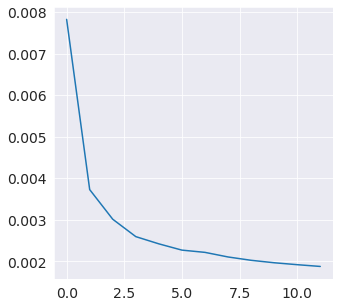

In [ ]:
# plotting the loss value of each epoch
plt.plot(history.history['loss'])

###4. Evaluate Network

In [ ]:
loss = model.evaluate(X_train, y_train)

1315/1315 [==============================] - 32s 24ms/step - loss: 0.0013 - mse: 0.0011 - mae: 0.0185 - mape: 598756.4375


In [ ]:
print(loss)

[0.0013382441829890013, 0.0010945205576717854, 0.018482575193047523, 598756.4375]


The network can be evaluated on the training data, but this will not provide a useful indication of the performance of the network as a predictive model, as it has seen all of this data before.  
We can evaluate the performance of the network on a separate dataset, unseen during testing. This will provide an estimate of the performance of the network at making predictions for unseen data in the future.

###5. Making Predictions

**Preprocessing the Test Dataset**

- We collect last 30 days data from train dataset

In [ ]:
last_30_days = data[data['Year']<2018].tail(30).copy()
last_30_days.tail()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall
42086,2017,9,25,5,28.9,0.0,359.2,981.3,77.0,2.0
42087,2017,9,25,6,30.5,0.0,359.2,980.8,70.0,2.0
42088,2017,9,25,7,31.2,0.0,359.2,979.9,64.0,2.0
42089,2017,9,25,8,32.3,0.0,359.2,979.5,65.0,2.0
42090,2017,9,25,9,32.4,0.0,359.2,978.8,62.0,4.0


In [ ]:
test.head()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall
42091,2018,1,11,10,0.0,0.0,359.2,925.0,0.0,0.0
42092,2018,1,11,11,0.0,0.0,359.2,925.0,0.0,0.0
42093,2018,1,11,12,0.0,0.0,359.2,925.0,0.0,0.0
42094,2018,1,11,13,0.0,0.0,359.2,925.0,0.0,0.0
42095,2018,1,11,14,0.0,0.0,359.2,925.0,0.0,0.0


In [ ]:
#Adding last 30 days of train data and test data.
test_final = last_30_days.append(test, ignore_index=True)
test_final.head()

,Year,Month,Day,Hour,air_temp,windspeed,winddir,pressure,humidity,rainfall
0,2017,9,24,4,23.8,0.0,359.2,983.2,100.0,2.0
1,2017,9,24,5,24.6,0.0,359.2,983.4,100.0,2.0
2,2017,9,24,6,25.5,0.0,359.2,983.2,99.0,2.0
3,2017,9,24,7,26.9,0.0,359.2,982.6,95.0,2.0
4,2017,9,24,8,27.6,0.0,359.2,981.9,91.0,2.0


In [ ]:
#Scaling columns in the final test data.
test_final = scaler.fit_transform(test_final)
test_final

array([[0.        , 0.72727273, 0.76666667, ..., 0.96523929, 1.        ,
        0.01360544],
       [0.        , 0.72727273, 0.76666667, ..., 0.96574307, 1.        ,
        0.01360544],
       [0.        , 0.72727273, 0.76666667, ..., 0.96523929, 0.99      ,
        0.01360544],
       ...,
       [1.        , 0.63636364, 0.93333333, ..., 0.95264484, 1.        ,
        1.        ],
       [1.        , 0.63636364, 0.93333333, ..., 0.95088161, 1.        ,
        1.        ],
       [1.        , 0.63636364, 0.93333333, ..., 0.94785894, 1.        ,
        1.        ]])

In [ ]:
#Creating two empty lists X_test and y_test
X_test = []
y_test = []

- As we collect 30 days past data for every target value in the train dataset, similarly for all values in test data  it will take past 30 days values for each target value.

In [ ]:
for i in range(30, test_final.shape[0]):
  X_test.append(test_final[i-30:i])
  y_test.append(test_final[i,4])

In [ ]:
# converting into array.
X_test , y_test = np.array(X_test) , np.array(y_test)

In [ ]:
X_test.shape , y_test.shape

((12060, 30, 10), (12060,))

***`Predicting on test data`***





In [ ]:
y_preds = model.predict(X_test)

In [ ]:
print('1st predicted value: ',y_preds[0])
print('1st original value: ', y_test[0])

1st predicted value:  [0.604719]
1st original value:  0.0


In [ ]:
# getting the coeffs of scaler for each column
scaler.scale_

array([0.5       , 0.09090909, 0.03333333, 0.04347826, 0.02136752,
       0.16949153, 0.00278396, 0.00251889, 0.01      , 0.00680272])

In [ ]:
# inversing the value
scale = 1/scaler.scale_[0]

In [ ]:
# inverse scaling to get original values.
y_preds = y_preds*scale
y_test = y_test*scale

In [ ]:
print('predicted value: ',y_preds[150])
print('original value: ', y_test[150])

predicted value:  [0.52454066]
original value:  0.5213675213675214


###Evaluating the loss on test data

In [ ]:
loss = model.evaluate(X_test, y_test)

377/377 [==============================] - 9s 24ms/step - loss: 0.3623 - mse: 0.3621 - mae: 0.5597 - mape: 1159524.0000


In [ ]:
print(loss)

[0.36231669783592224, 0.36207300424575806, 0.5596630573272705, 1159524.0]


###Visualizing the result

In [ ]:
# for finding the rmse formodel.compile(optimizer='adamax', loss='mse',  metrics=['mse','mae', 'mape'])
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print(rmse)

0.1197272847825759


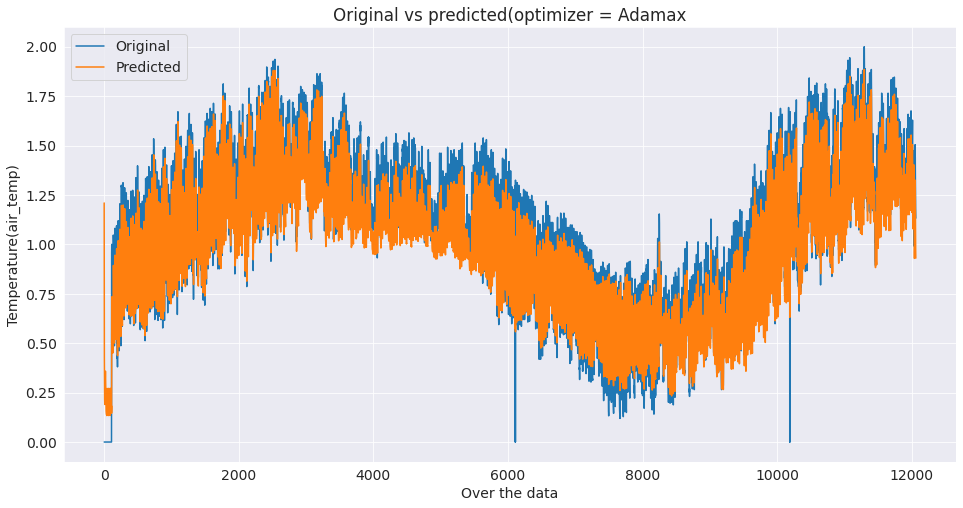

In [ ]:
# plotting the original Vs Predicted values graphically.
plt.figure(figsize=(16,8))
plt.title('Original vs predicted(optimizer = Adamax')
plt.xlabel('Over the data')
plt.ylabel('Temperature(air_temp)')
plt.plot(y_test)
plt.plot(y_preds)
plt.legend(['Original','Predicted'])
plt.show()

###Summary

In [ ]:
adamax_rmse = 0.07551006692661409
sgd_rmse = 0.17402287014681553    
adam_rmse = 0.07733108661133752
Rmsprop_rmse = 0.11112806005510606

##### median imputation
adamax = 0.138352   
adam = 0.133740

#### zero imputation
adamax = 0.09788810767988587  
adam =  0.1197272847825759

In [ ]:
rmse = pd.DataFrame({
    'Optimizers': ['Adamax','SGD','Adam','Rmsprop'],
    'Rmse' : [adamax_rmse,sgd_rmse,adam_rmse,Rmsprop_rmse],
})

In [ ]:
rmse

,Optimizers,Rmse
0,Adamax,0.075510
1,SGD,0.174023
2,Adam,0.077331
3,Rmsprop,0.111128
